<a href="https://colab.research.google.com/github/Lasata-T/Group1Project2/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import matplotlib.dates as mdates
from google.colab import files
import io

In [ ]:
# data source 1: https://covid.cdc.gov/covid-data-tracker/#trends_weeklyhospitaladmissions_select_00

In [ ]:
# data source 2: https://covid.cdc.gov/covid-data-tracker/#trends_weeklydeaths_select_00

In [ ]:
uploaded = files.upload()

Saving weekly_hospital.csv to weekly_hospital.csv


In [ ]:
df = pd.read_csv('weekly_hospital.csv')
print(df)

         Geography         Date  Weekly COVID-19 Hospital Admissions
0    United States  Feb 17 2024                              18977.0
1    United States  Feb 10 2024                              20129.0
2    United States  Feb  3 2024                              21212.0
3    United States  Jan 27 2024                              23297.0
4    United States  Jan 20 2024                              25979.0
..             ...          ...                                  ...
210  United States  Feb  8 2020                                  NaN
211  United States  Feb  1 2020                                  NaN
212  United States  Jan 25 2020                                  NaN
213  United States  Jan 18 2020                                  NaN
214  United States  Jan 11 2020                                  NaN

[215 rows x 3 columns]


In [ ]:
df_new = df.dropna()
df_new

,Geography,Date,Weekly COVID-19 Hospital Admissions
0,United States,Feb 17 2024,18977.0
1,United States,Feb 10 2024,20129.0
2,United States,Feb 3 2024,21212.0
3,United States,Jan 27 2024,23297.0
4,United States,Jan 20 2024,25979.0
...,...,...,...
180,United States,Sep 5 2020,26462.0
181,United States,Aug 29 2020,28194.0
182,United States,Aug 22 2020,29424.0
183,United States,Aug 15 2020,29869.0


In [ ]:
geo = df_new['Geography']
date = df_new['Date']
admin = df_new['Weekly COVID-19 Hospital Admissions']

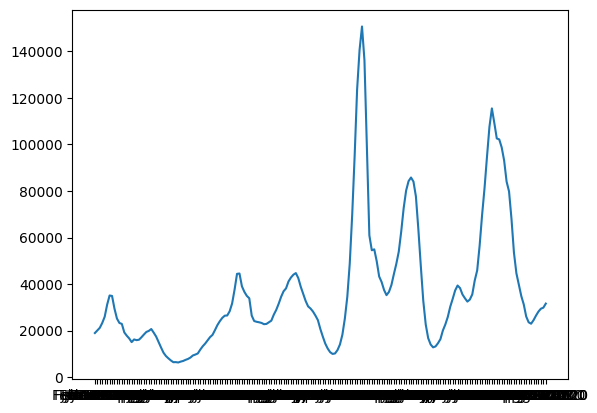

In [ ]:
plt.plot(date, admin)

In [ ]:
type(df_new['Date'])

pandas.core.series.Series

In [ ]:
df_new['Date'] = df_new['Date'].sort_values(ascending = False)

<ipython-input-12-a85ddfeae93a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Date'] = df_new['Date'].sort_values(ascending = False)


In [ ]:
df_new

,Geography,Date,Weekly COVID-19 Hospital Admissions
0,United States,Feb 17 2024,18977.0
1,United States,Feb 10 2024,20129.0
2,United States,Feb 3 2024,21212.0
3,United States,Jan 27 2024,23297.0
4,United States,Jan 20 2024,25979.0
...,...,...,...
180,United States,Sep 5 2020,26462.0
181,United States,Aug 29 2020,28194.0
182,United States,Aug 22 2020,29424.0
183,United States,Aug 15 2020,29869.0


In [ ]:
uploaded2 = files.upload()

Saving death.csv to death (1).csv


In [ ]:
df2 = pd.read_csv(io.BytesIO(uploaded['death.csv']))
print(df2)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 4
